In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
import numpy as np

# Descargar los recursos necesarios para VADER
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\evely\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Cargar el dataset
yelp_reviews = pd.read_csv('yelp_reviews.csv')

# Ver las primeras filas para asegurarte de que cargó bien
yelp_reviews.head()


,business_id,name,Address,city,state,postal_code,latitude,longitude,stars_x,review_count,categories,review_id,stars_y,useful,funny,cool,text
0,Opbg2Crwgxa2Dlchfvdjq,Gourmelt,Sin Dato,Reno,In,0.0,39.51529,-119.812013,4.0,51,Restaurants Food Trucks Food Food Stands,6Sun_3I_Hgvwbpet2Swvoa,5,0,0,0,Super Great Had A Lunch Sandwich And A Sweet S...
1,Opbg2Crwgxa2Dlchfvdjq,Gourmelt,Sin Dato,Reno,In,0.0,39.51529,-119.812013,4.0,51,Restaurants Food Trucks Food Food Stands,Ryrw1Ah71Gydamvmzdwlgq,4,0,0,0,This Was My Second Visit To The Gourmelt Truck...
2,Opbg2Crwgxa2Dlchfvdjq,Gourmelt,Sin Dato,Reno,In,0.0,39.51529,-119.812013,4.0,51,Restaurants Food Trucks Food Food Stands,8Snwpr4Xkwjhr3I2Rcsyta,5,1,0,1,I Cannot Believe There Is Actual Negative Feed...
3,Opbg2Crwgxa2Dlchfvdjq,Gourmelt,Sin Dato,Reno,In,0.0,39.51529,-119.812013,4.0,51,Restaurants Food Trucks Food Food Stands,5F046Ufyidpn8Nnzhuldw,5,0,0,0,I Call Myself A Grilled Cheese Groupie Because...
4,Opbg2Crwgxa2Dlchfvdjq,Gourmelt,Sin Dato,Reno,In,0.0,39.51529,-119.812013,4.0,51,Restaurants Food Trucks Food Food Stands,Xkorqm_Jrovth7Kecoxvxg,4,0,0,0,One Of The Best Finds In Town The Tomato Soup ...


Realizar el Análisis de Sentimientos

In [3]:
# Inicializar el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Función para obtener la etiqueta de sentimiento
def get_sentiment_label(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Crear la columna 'sentiment_label' con el análisis de sentimientos
yelp_reviews['sentiment_label'] = yelp_reviews['text'].apply(get_sentiment_label)

# Ver las primeras filas con la nueva columna
yelp_reviews.head()


,business_id,name,Address,city,state,postal_code,latitude,longitude,stars_x,review_count,categories,review_id,stars_y,useful,funny,cool,text,sentiment_label
0,Opbg2Crwgxa2Dlchfvdjq,Gourmelt,Sin Dato,Reno,In,0.0,39.51529,-119.812013,4.0,51,Restaurants Food Trucks Food Food Stands,6Sun_3I_Hgvwbpet2Swvoa,5,0,0,0,Super Great Had A Lunch Sandwich And A Sweet S...,positive
1,Opbg2Crwgxa2Dlchfvdjq,Gourmelt,Sin Dato,Reno,In,0.0,39.51529,-119.812013,4.0,51,Restaurants Food Trucks Food Food Stands,Ryrw1Ah71Gydamvmzdwlgq,4,0,0,0,This Was My Second Visit To The Gourmelt Truck...,positive
2,Opbg2Crwgxa2Dlchfvdjq,Gourmelt,Sin Dato,Reno,In,0.0,39.51529,-119.812013,4.0,51,Restaurants Food Trucks Food Food Stands,8Snwpr4Xkwjhr3I2Rcsyta,5,1,0,1,I Cannot Believe There Is Actual Negative Feed...,positive
3,Opbg2Crwgxa2Dlchfvdjq,Gourmelt,Sin Dato,Reno,In,0.0,39.51529,-119.812013,4.0,51,Restaurants Food Trucks Food Food Stands,5F046Ufyidpn8Nnzhuldw,5,0,0,0,I Call Myself A Grilled Cheese Groupie Because...,positive
4,Opbg2Crwgxa2Dlchfvdjq,Gourmelt,Sin Dato,Reno,In,0.0,39.51529,-119.812013,4.0,51,Restaurants Food Trucks Food Food Stands,Xkorqm_Jrovth7Kecoxvxg,4,0,0,0,One Of The Best Finds In Town The Tomato Soup ...,positive


Filtrar las Reseñas Negativas

In [4]:
# Filtrar solo las reseñas negativas
negative_reviews = yelp_reviews[yelp_reviews['sentiment_label'] == 'negative']

# Mostrar las primeras filas de reseñas negativas
negative_reviews.head()


,business_id,name,Address,city,state,postal_code,latitude,longitude,stars_x,review_count,categories,review_id,stars_y,useful,funny,cool,text,sentiment_label
44,Bl1Qahdzx9A2Jbg10Ccbg,Edith Palmers Country Inn,416 S B St,Virginia City,Ca,89440.0,39.305301,-119.652293,4.5,14,Bed Breakfast Event Planning Services Hotels...,B7Fwegztvbgafjtumg6Tlq,1,1,1,0,We Started To Check In Friday May 24 2019 And ...,negative
45,Mqi7Drvusi8Ktwvx5P0Hq,Silver Spoon Eatery,171 South C St,Virginia City,Pa,89440.0,39.308523,-119.650136,5.0,10,Sandwiches Restaurants Coffee Tea Desserts Food,Yfo5Vyyv0Wlgmh_Lv7T48Q,5,1,0,0,We Discovered This Place By Accident Walking A...,negative
51,3Bgkyo1O1P38V77Eybltqg,Reds Old Fashioned Candies,68 S C St,Virginia City,Pa,89440.0,39.309911,-119.650029,3.0,59,Ice Cream Frozen Yogurt Food Specialty Food S...,Lfq5Ziph9C8Kczq4_Gqfca,1,11,3,0,On A Recent Visit To Virginia City I Made The ...,negative
52,3Bgkyo1O1P38V77Eybltqg,Reds Old Fashioned Candies,68 S C St,Virginia City,Pa,89440.0,39.309911,-119.650029,3.0,59,Ice Cream Frozen Yogurt Food Specialty Food S...,Wnvmbmsjb0Lajhxsmujq,1,2,0,0,We Bought Rocky Road Chocolate Here Out Of The...,negative
53,3Bgkyo1O1P38V77Eybltqg,Reds Old Fashioned Candies,68 S C St,Virginia City,Pa,89440.0,39.309911,-119.650029,3.0,59,Ice Cream Frozen Yogurt Food Specialty Food S...,5Njlcq53D4Pwn2Cclgya8W,1,0,0,0,Went In For Some Ice Cream Dont Recommend This...,negative


In [5]:
#  Visualizar Número de Reseñas Negativas por Ciudad ===
# Suponiendo que existe una columna 'city' con la ciudad del negocio
city_counts = negative_reviews['city'].value_counts().reset_index()
city_counts.columns = ['city', 'negative_review_count']


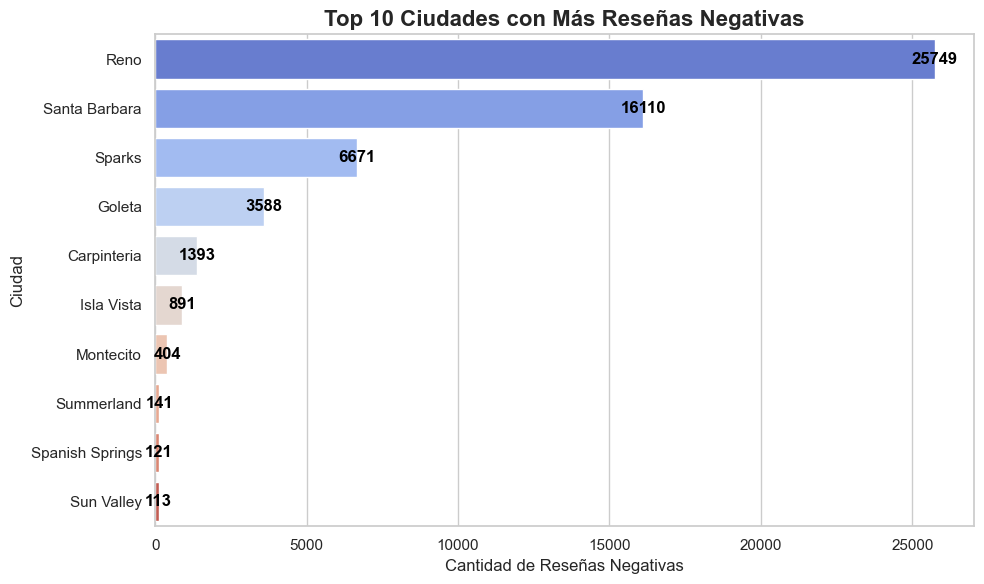

In [6]:
plt.figure(figsize=(10, 6))

# Estilo de Seaborn para gráficos más atractivos
sns.set(style="whitegrid")

# Gráfico de barras con colores personalizados, usando hue y sin leyenda
sns.barplot(x='negative_review_count', y='city', data=city_counts.head(10), hue='city', palette='coolwarm', legend=False)

# Añadir título y etiquetas
plt.title('Top 10 Ciudades con Más Reseñas Negativas', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de Reseñas Negativas', fontsize=12)
plt.ylabel('Ciudad', fontsize=12)

# Añadir anotaciones para cada barra (valores exactos)
for index, value in enumerate(city_counts['negative_review_count'].head(10)):
    plt.text(value + 0.5, index, str(value), color='black', ha="center", va="center", fontweight='bold')

# Mostrar gráfico
plt.tight_layout()
plt.show()



In [7]:
# Visualizar Negocios con más Reseñas Negativas ===
# Suponiendo que existe una columna 'business_name' con el nombre del negocio
business_counts = negative_reviews['name'].value_counts().reset_index()
business_counts.columns = ['name', 'negative_review_count']


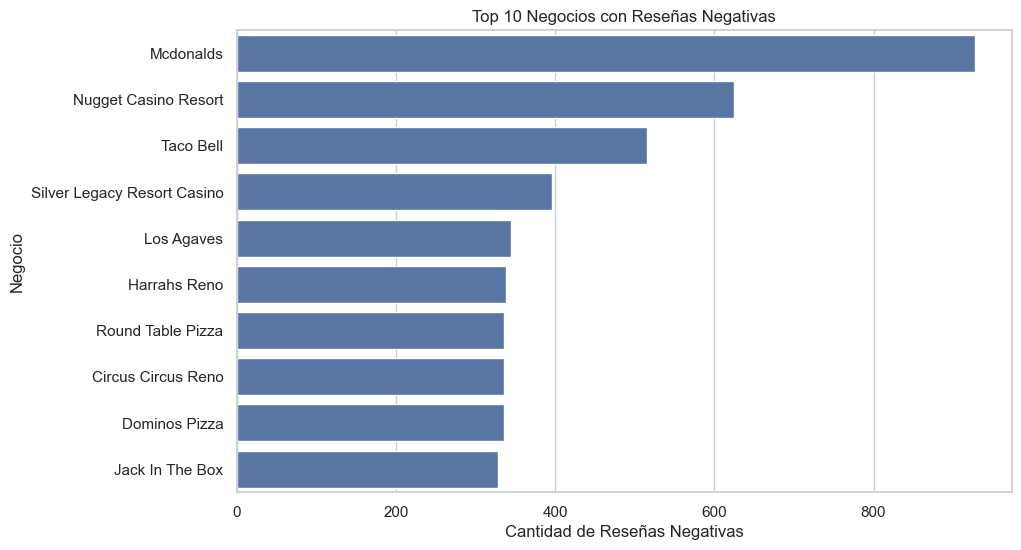

In [8]:
# Gráfico de barras de negocios con más reseñas negativas
plt.figure(figsize=(10, 6))
sns.barplot(x='negative_review_count', y='name', data=business_counts.head(10))  # Solo los 10 primeros negocios
plt.title('Top 10 Negocios con Reseñas Negativas')
plt.xlabel('Cantidad de Reseñas Negativas')
plt.ylabel('Negocio')
plt.show()

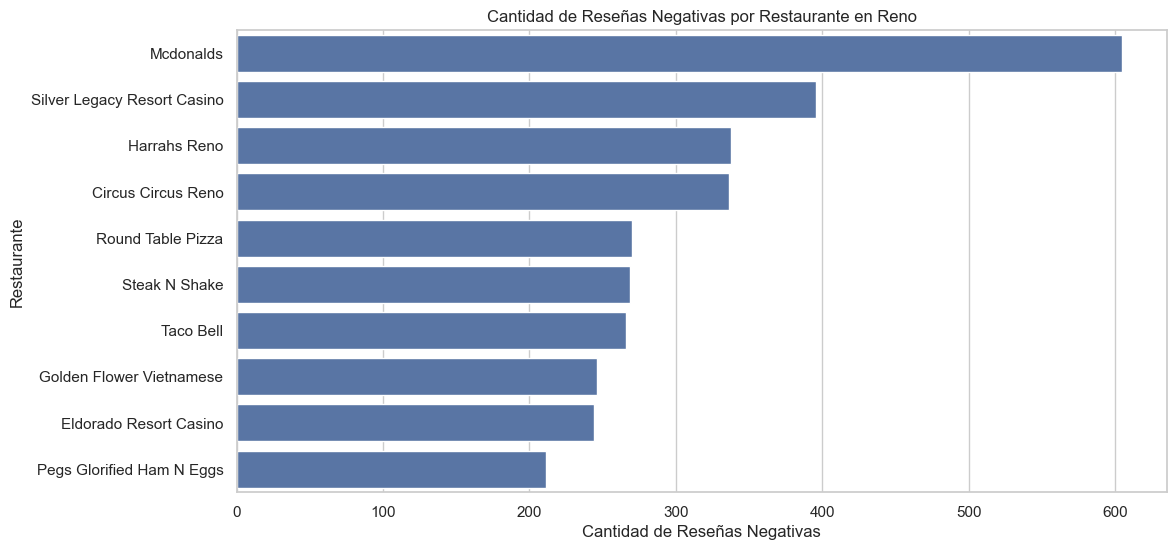

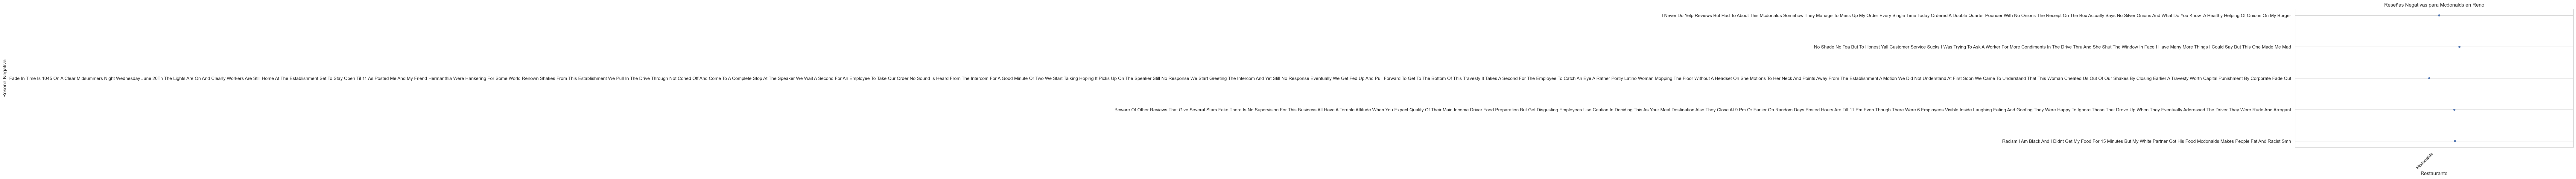

In [12]:
# Función para mostrar reseñas negativas y graficar
def show_negative_reviews_by_city(city):
    # Filtrar las reseñas negativas por ciudad
    city_negative_reviews = negative_reviews[negative_reviews['city'] == city]
    
    # Verificar si hay reseñas negativas en la ciudad
    if city_negative_reviews.empty:
        print(f"No hay reseñas negativas para la ciudad: {city}")
        return
    
    # Contar reseñas negativas por restaurante
    negative_review_counts = city_negative_reviews['name'].value_counts().reset_index()
    negative_review_counts.columns = ['restaurant', 'negative_review_count']
    
    # Identificar el restaurante con más reseñas negativas
    top_restaurant = negative_review_counts.iloc[0]['restaurant']
    
    # Filtrar las reseñas negativas para ese restaurante
    top_restaurant_reviews = city_negative_reviews[city_negative_reviews['name'] == top_restaurant]
    
    # Seleccionar hasta 5 reseñas negativas del restaurante con más reseñas
    limited_reviews = top_restaurant_reviews.head(5)
    
    # Graficar la cantidad de reseñas negativas para el restaurante
    plt.figure(figsize=(12, 6))
    sns.barplot(x='negative_review_count', y='restaurant', data=negative_review_counts.head(10))
    plt.title(f'Cantidad de Reseñas Negativas por Restaurante en {city}')
    plt.xlabel('Cantidad de Reseñas Negativas')
    plt.ylabel('Restaurante')
    plt.show()
    
    # Graficar ejemplos de reseñas negativas (hasta 5 por restaurante)
    plt.figure(figsize=(12, 6))
    sns.stripplot(x='name', y='text', data=limited_reviews)
    plt.title(f'Reseñas Negativas para {top_restaurant} en {city}')
    plt.xlabel('Restaurante')
    plt.ylabel('Reseña Negativa')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Función principal para seleccionar ciudad y generar gráficas
def main():
    selected_city = input("Introduce el nombre de la ciudad (ej. 'Reno'): ")
    show_negative_reviews_by_city(selected_city)

# Ejecutar la función principal
if __name__ == "__main__":
    main()

Aplicar TF-IDF Solo a las Reseñas Negativas

In [13]:
# Aplicar TF-IDF a las reseñas negativas
vectorizer = TfidfVectorizer(max_features=1000)  # Ajusta max_features según lo necesites
X_text = vectorizer.fit_transform(negative_reviews['text'])


Asegurar que los Datos de Geolocalización Coincidan con las Reseñas Negativas

In [14]:
# Asegurarse de que los datos de geolocalización coincidan con las reseñas negativas
X_geo = negative_reviews[['latitude', 'longitude']].reset_index(drop=True)

# Mostrar las primeras filas de X_geo
X_geo.head()


,latitude,longitude
0,39.305301,-119.652293
1,39.308523,-119.650136
2,39.309911,-119.650029
3,39.309911,-119.650029
4,39.309911,-119.650029


Concatenar TF-IDF y Geolocalización

In [23]:
from scipy.sparse import hstack  # Asegúrate de importar hstack
from scipy.sparse import csr_matrix  # Para convertir X_geo en matriz dispersa

# Convertir X_geo a matriz dispersa para poder concatenarlo con X_text
X_geo_sparse = csr_matrix(X_geo)

# Combinar las dos matrices (TF-IDF + Coordenadas)
X = hstack([X_text, X_geo_sparse])


Crear la Variable Objetivo

In [21]:
# Crear la variable objetivo a partir del conteo de caracteres
threshold = 50  # Ajusta el umbral según tus necesidades
negative_reviews['negative_review_count'] = negative_reviews['text'].apply(lambda x: len(x))

# Crear la variable objetivo 'y'
y = negative_reviews['negative_review_count'].apply(lambda x: 1 if x > threshold else 0)


C:\Users\evely\AppData\Local\Temp\ipykernel_13988\2884706663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['negative_review_count'] = negative_reviews['text'].apply(lambda x: len(x))


Dividir en Conjuntos de Entrenamiento y Prueba

In [24]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver las dimensiones de los conjuntos de entrenamiento y prueba
print(X_train.shape, X_test.shape)

(44289, 1002) (11073, 1002)


ENTRENAMIENTO

In [26]:
# Crear nombres de columnas para las características de TF-IDF y geolocalización
tfidf_columns = [f'tfidf_{i}' for i in range(X_text.shape[1])]
geo_columns = ['latitude', 'longitude']

# Combinar los nombres de columnas
all_columns = tfidf_columns + geo_columns

# Convertir las matrices dispersas a DataFrame
X_train_df = pd.DataFrame(X_train.toarray(), columns=all_columns)
X_test_df = pd.DataFrame(X_test.toarray(), columns=all_columns)

# Verifica las primeras filas para asegurarte de que las conversiones son correctas
X_train_df.head()
X_test_df.head()


,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,...,tfidf_992,tfidf_993,tfidf_994,tfidf_995,tfidf_996,tfidf_997,tfidf_998,tfidf_999,latitude,longitude
0,0.0,0.0,0.0,0.0,0.0,0.0,0.204715,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,39.528789,-119.814354
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.246787,0.0,39.506363,-119.797213
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,34.413456,-119.691322
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,34.440627,-119.736780
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.210062,0.0,...,0.0,0.0,0.096773,0.0,0.132206,0.0,0.000000,0.0,34.414556,-119.691868


In [51]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# 1. Contar Reseñas Negativas por Ubicación
heatmap_data = negative_reviews.groupby(['latitude', 'longitude']).size().reset_index(name='count')

# 2. Crear un Mapa
m = folium.Map(location=[heatmap_data['latitude'].mean(), heatmap_data['longitude'].mean()], zoom_start=12)

# 3. Agregar el Mapa de Calor
HeatMap(data=heatmap_data[['latitude', 'longitude', 'count']], radius=15).add_to(m)

# 4. Mostrar el Mapa
m.save('heatmap.html')  # Guarda el mapa en un archivo HTML
m  # Muestra el mapa en el entorno Jupyter


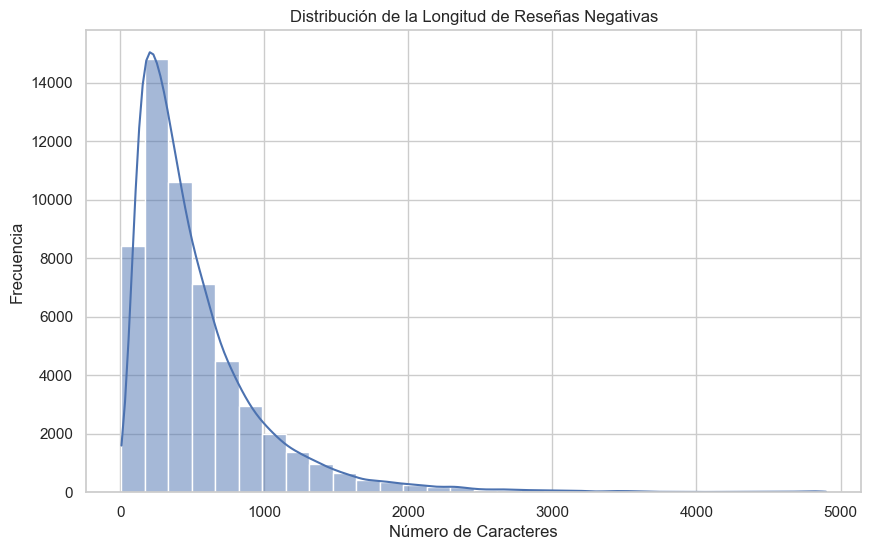

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(negative_reviews['negative_review_count'], bins=30, kde=True)
plt.title('Distribución de la Longitud de Reseñas Negativas')
plt.xlabel('Número de Caracteres')
plt.ylabel('Frecuencia')
plt.show()


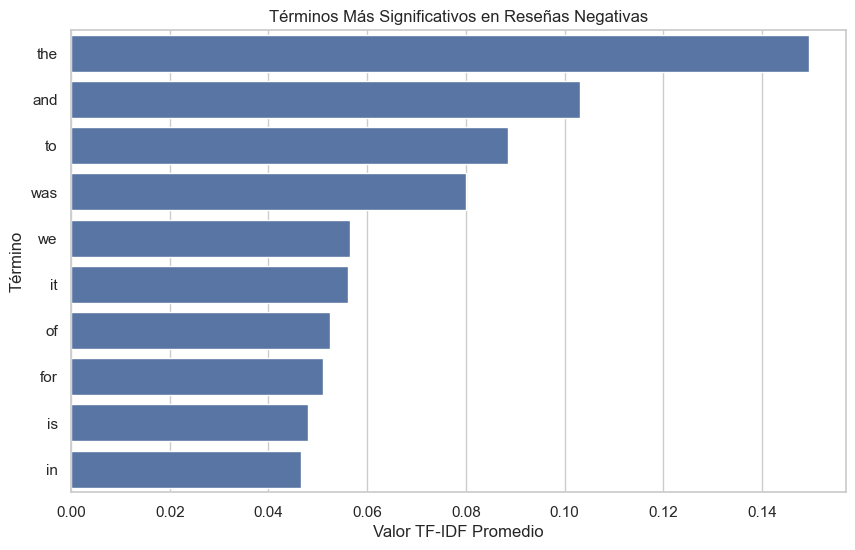

In [48]:
feature_names = vectorizer.get_feature_names_out()
tfidf_array = X_text.toarray()
avg_tfidf = np.mean(tfidf_array, axis=0)
top_indices = avg_tfidf.argsort()[-10:][::-1]  # 10 términos más significativos

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_tfidf[top_indices], y=feature_names[top_indices])
plt.title('Términos Más Significativos en Reseñas Negativas')
plt.xlabel('Valor TF-IDF Promedio')
plt.ylabel('Término')
plt.show()


In [42]:
# Definir el clasificador
rf_model = RandomForestClassifier(random_state=42)

# Crear el pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Sobremuestreo
    ('classifier', rf_model)  # Clasificador
])

# Dividir los datos para poder calcular las métricas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el pipeline en los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred = pipeline.predict(X_test)
y_probs = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Evaluar el modelo usando validación cruzada estratificada
scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')

# Mostrar los resultados
print("F1 Scores de validación cruzada:", scores)

F1 Scores de validación cruzada: [0.99918648 0.99909576 0.99923136 0.99905059 0.99936715]


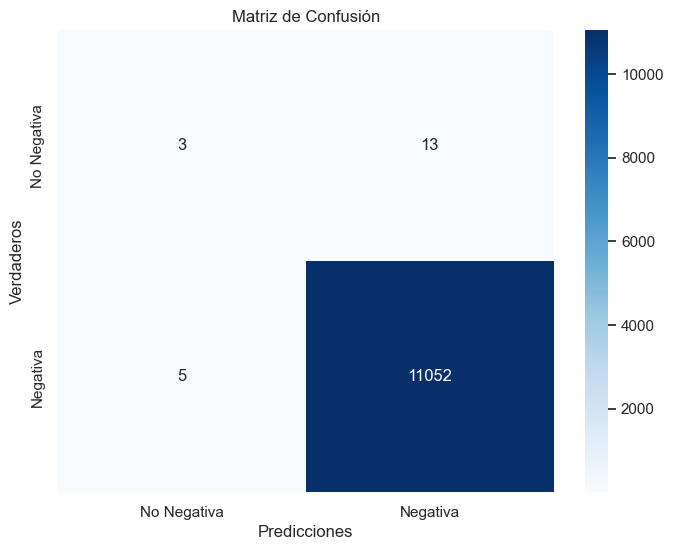

In [43]:
# 1. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Negativa', 'Negativa'], yticklabels=['No Negativa', 'Negativa'])
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()


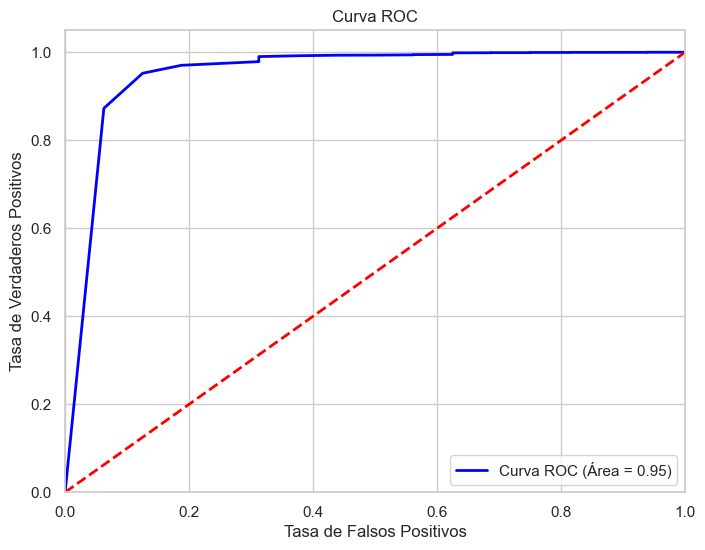

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (Área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

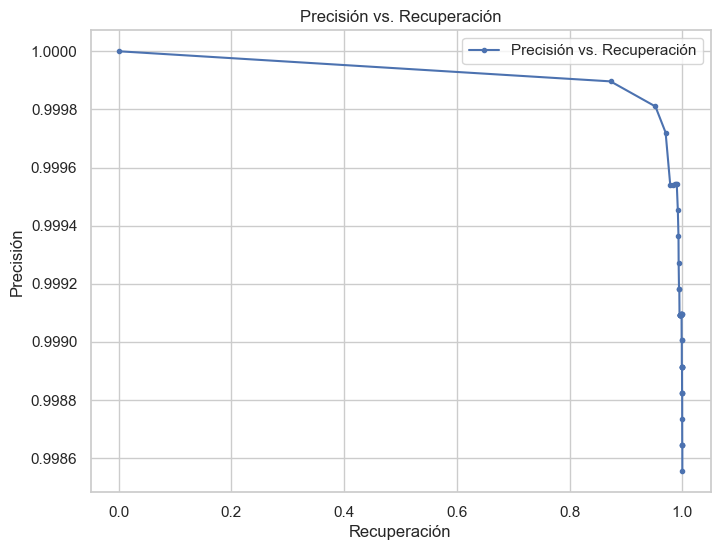

In [45]:
# 3. Gráfico de Precisión y Recuperación
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precisión vs. Recuperación')
plt.xlabel('Recuperación')
plt.ylabel('Precisión')
plt.title('Precisión vs. Recuperación')
plt.legend()
plt.show()

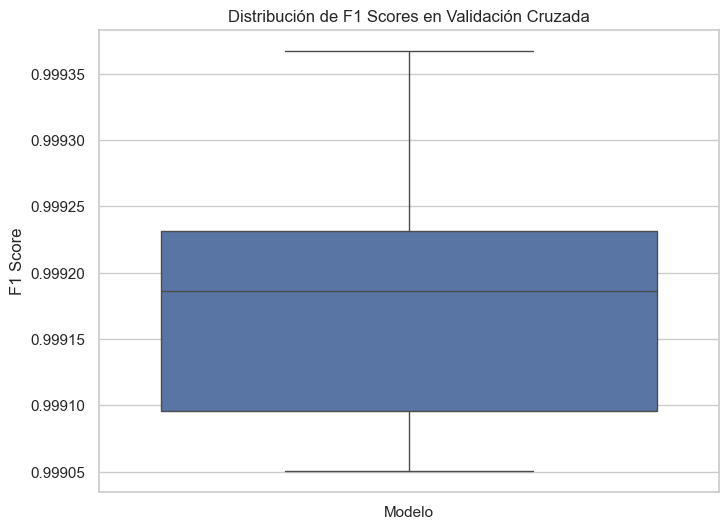

In [46]:
# 4. Gráfico de Boxplot de F1 Scores (opcional)
plt.figure(figsize=(8, 6))
sns.boxplot(data=scores)
plt.title('Distribución de F1 Scores en Validación Cruzada')
plt.ylabel('F1 Score')
plt.xticks([0], ['Modelo'])
plt.show()